<a href="https://colab.research.google.com/github/luciansantana/olympic-games/blob/master/Olimpiadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## O banco de dados utilizado neste notebook, se trata de informações dos atletas que disputaram os Jogos Olímpicos durante anos de 1986 a 2016.

# Importando bibliotecas

In [0]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt 


# Lendo e conhecendo o banco de dados

In [0]:
athlets = pd.read_csv("https://raw.githubusercontent.com/luciansantana/olympic-games/master/athlete_events.csv?token=AO27OWE4WTSMJ7U6ALCDJXC63LZV4")
athlets.head()

Temos então uma tabela em que mostra total de medalhas conquistadas por atleta em cada nação.

In [0]:
medalist = athlets.dropna(subset = ["Medal"])
medalist['Team'].value_counts()

In [0]:
medalist['Team'].value_counts()[:20].plot(kind ='barh',figsize = (22,8))

Vale destacar a soberania da nação americana diantes os outros. Outro ressalva em função com a unidade fedarativa Rússia, por questões politicas e historicas, a nação disputou em momentos diferentes da história com dois nomes em vigencia: Russia(RUS) e Soviet Unian(URS).

Houve então, um agrupamento dos atletas que levam o nome de Soviet Union e Russia, para Russia Federation

In [0]:
athlets['Team'] = athlets['Team'].replace(to_replace = ['Soviet Union','Russia'],value = 'Russia Federation')
athlets['NOC'] = athlets['NOC'].replace(to_replace = ['URS'],value = 'RUS')


In [0]:
medalist['Team'].value_counts()

In [0]:
medalist['Team'].value_counts()[:20].plot(kind = 'barh',figsize = (22,8))

Com isso a União Federativa da Rússia chegando a 3561 atletas com medalhas conquistadas, 1658 a menos que o Estados Unidos e 1577 a mais que a Alemanha 

In [0]:
athlets['City'].value_counts()[:20]

 A cidade em que mais foi palco de atrações olímpicas foi Londres (Inglaterra), e em seguida Athina (Grécia) e Sidney (Austrália)

In [0]:
medalist['Name'].value_counts()[:10].plot(kind = 'barh',figsize = (22,8))

O atleta com mais medalhas na historia das olimpiadas, é Michael Fred Phelps, nadador que até então se encontra aposentado. Disputou as olimpiadas entre as edições de 2000 a 2016

In [0]:
phelps = athlets[athlets['Name']=='Michael Fred Phelps, II']
phelps['Medal'].value_counts()

Michael Phelps disputou 30 medalhas, e conquistou 28 medalhas, o que mostra acaba mostrando a eficiencia do atleta americano. Das medalhas conquistadas, 23 são de ouro, o que representa o total de 82.14%.

# Análise histórica

Como os dados estão por atletas, foi preciso criar funções que conseguissem captar a quantidade de medalhas conquistadas pela nação, mas nestas funções foi constatado a quantidade de medalhas por eventos, pois pegando os dados apenas por atleta, dois atletas diferentes poderiam ganhar a mesma medalha devido aos esportes coletivos. Com isso vamos trabalhar a partir de agora com os dados conquistados por eventos. Exemplo, Event: 'Bobsleigh Men's Four'

In [70]:
medalseason('BRA')

,Year,Medals,NOC,Number
0,1896,0,BRA,0
1,1900,0,BRA,1
2,1904,0,BRA,0
3,1906,0,BRA,0
4,1908,0,BRA,0
5,1912,0,BRA,0
6,1920,3,BRA,19
7,1924,0,BRA,12
8,1928,0,BRA,0
9,1932,0,BRA,59


In [0]:
def medalseason(noc):
  data0 = athlets[athlets['NOC']==noc]
  datax = athlets[athlets['Season']=='Summer']
  #datax = athlets
  data0 = data0[data0['Season']=='Summer']
  data0_med = data0.dropna(subset = ['Medal'])
  year = datax.Year.unique()
  year = sorted(year)
  data2 = []
  numero1 = []
  for i in year:
    data1 = data0_med[data0_med['Year']==i]
    datax = data0[data0['Year']==i]
    medalhas = data1.Medal.unique()
    numero = len(datax.Name.unique())
    numero1.append(numero)
    medal2 = []
    for j in medalhas:
      medal0 = data1[data1['Medal']==j]
      medal1 = medal0.Event.unique().shape[0]
      medal2.append(medal1)
    soma = sum(medal2)
    data2.append(soma)
  nomes = [noc]*len(year)
  obj = {'Year': year,'Medals' : data2,'NOC': [noc]*len(year),'Number' : numero1}
  data3 = pd.DataFrame(obj)

  return data3
def medalacum(noc):
  data0 = medalseason(noc)
  tamanho = range(1,data0.shape[0])
  #tamanho = range(1,len(data0))
  data1 = data0['Medals']
  for j in tamanho:
     #data0.iloc[j][1] = data0.iloc[j][1]+data0.iloc[j-1][1]
     data1[j]= data1[j]+data1[j-1]
  data0['Medals']=data1
  return data0

def geralacum():
  noc = athlets.NOC.unique()
  noc = sorted(noc)
  anos = athlets[athlets['Season']=='Summer']
  anos = anos.Year.unique()
  anos = sorted(anos)
  data1 = pd.DataFrame()
  for i in noc:
    data = medalacum(i)
    data = pd.DataFrame(data)
    data1 = pd.concat([data1,data],axis = 0)
  #data1.columns = noc
  #data1.index = anos
  return data1
def geralseason():
  noc = athlets.NOC.unique()
  noc = sorted(noc)
  anos = athlets[athlets['Season']=='Summer']
  anos = anos.Year.unique()
  anos = sorted(anos)
  data1 = pd.DataFrame()
  for i in noc:
    data = medalseason(i)
    data = pd.DataFrame(data)
    data1 = pd.concat([data1,data],axis = 0)
  #data1.columns = noc
  #data1.index = anos
  return data1

In [71]:
tabelacum = geralacum()
tabelasea = geralseason()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [74]:
medalseason('BRA')

,Year,Medals,NOC,Number
0,1896,0,BRA,0
1,1900,0,BRA,1
2,1904,0,BRA,0
3,1906,0,BRA,0
4,1908,0,BRA,0
5,1912,0,BRA,0
6,1920,3,BRA,19
7,1924,0,BRA,12
8,1928,0,BRA,0
9,1932,0,BRA,59


Temos a lista então das 10 

In [75]:
tabelasea.groupby(['NOC'])['Medals'].apply(lambda x : x.astype('float').sum()).sort_values(ascending = False)[:10]


NOC
USA    2544.0
RUS    1465.0
GBR     892.0
GER     776.0
FRA     770.0
ITA     608.0
CHN     542.0
SWE     513.0
AUS     506.0
HUN     504.0
Name: Medals, dtype: float64

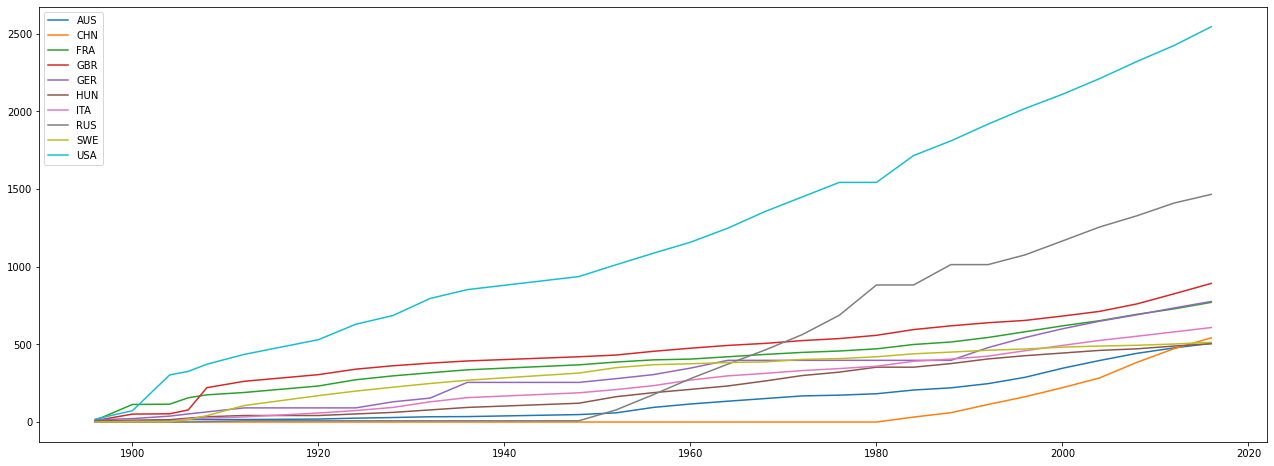

In [80]:
noc = ['AUS','CHN','FRA','GBR','GER','HUN','ITA','RUS','SWE','USA']
plt.figure(figsize = (22,8))
for i in noc:
  teste0 = tabelacum[tabelacum['NOC']==i]
  teste1 = teste0.set_index(['Year'])
  teste2 = teste1[['Medals']]
  plt.plot(teste2 , label = i)
  plt.legend()